In [6]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("Annual Emmissions Development.csv", index_col=0)

df = df.rename(columns={"Unnamed: 0": "rok", "0": "emissions_per_kwh"})

df = df.transpose()
df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
emissions_per_kwh,0.501099,0.499158,0.501063,0.504227,0.50432,0.497428,0.484564,0.473826,0.471351,0.466487,0.457296,0.443911,0.426523,0.405379,0.380771,0.353027,0.322499


In [7]:
black_coal = 6927
gas = 2640
electricity = 23895
heat_pump = 7407
coal_em_per_kg = 3.64
gas_em_per_kg = 1.85

In [8]:
emissions_per_source = [
    black_coal,
    gas,
    electricity,
    heat_pump,
    coal_em_per_kg,
    gas_em_per_kg,
]
emissions_per_source

[6927, 2640, 23895, 7407, 3.64, 1.85]

In [9]:
house_150_sqm = pd.DataFrame(columns=df.columns)
#
# house_150_sqm.set_index("rok")
house_150_sqm.loc["UH"] = black_coal * coal_em_per_kg
house_150_sqm.loc["PL"] = gas * gas_em_per_kg
house_150_sqm.loc["TC"] = df.loc["emissions_per_kwh"] * heat_pump
house_150_sqm.loc["EL"] = df.loc["emissions_per_kwh"] * electricity

house_150_sqm

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
UH,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000,25214.280000
PL,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000,4884.000000
TC,3711.639052,3697.263732,3711.370071,3734.809941,3735.496390,3684.447866,3589.163907,3509.632731,3491.299007,3455.267856,3387.193719,3288.047863,3159.254962,3002.641169,2820.369766,2614.868504,2388.752957
EL,11973.756602,11927.381784,11972.888869,12048.505945,12050.720431,11886.037771,11578.651487,11322.083718,11262.939082,11146.702501,10927.095168,10607.250397,10191.764186,9686.527708,9098.519719,8435.572148,7706.122845


Text(0, 0.5, 'Roční emise CO2 (kg)')

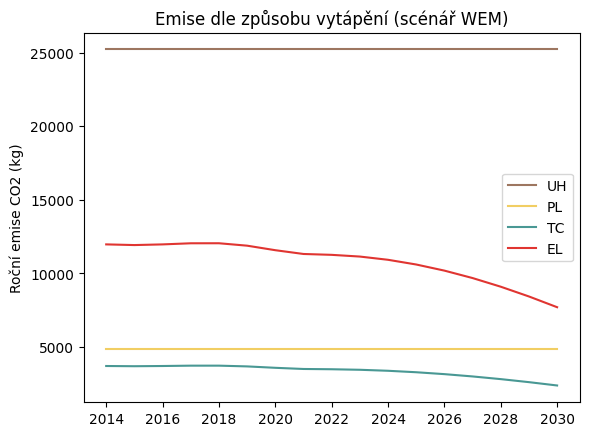

In [10]:
df_transposed = house_150_sqm.transpose()

colors_dict = {
    "UH": "#9D7660",
    "PL": "#F1CE63",
    "EL": "#e03531",
    "TC": "#499894",
}

colors = [colors_dict[column] for column in df_transposed.columns]

df_transposed.plot(color=colors)
plt.title("Emise dle způsobu vytápění (scénář WEM)")
plt.ylabel("Roční emise CO2 (kg)")